In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA 
import os
import sys
sys.path.insert(0, os.path.abspath('../Libraries'))
import countries 
import plotly.express as px
import matplotlib.pyplot as plt


Getting Europe subregions...
Getting ISO data...
Countries data loaded.


In [3]:
#gather data sets

education = pd.read_csv("../Datasets/cleaned_education.csv")
technology = pd.read_csv("../Datasets/cleaned_technology.csv")
esi = pd.read_csv("../Datasets/ESI_Clean.csv", index_col=0)
tax_rate = pd.read_csv("../Datasets/cleaned_unemploymentTaxRateDataset.csv")
productivity = pd.read_csv("../Datasets/cleaned_Productivity.csv")

For this, I will end up converting all codes to ISO-3, so the following table will have to be changed


In [4]:
tax_rate.head()

,COUNTRY,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,83.0,82.9,82.4,81.7,79.9,80.4,74.8,74.8,74.6,74.3,73.9,72.0,72.1,71.7,71.2,70.5,70.1
1,BE,85.2,84.9,85.3,85.5,92.1,91.0,90.7,91.9,98.1,97.6,96.9,95.8,95.8,93.8,93.0,92.4,91.6
2,CZ,65.7,63.5,59.9,59.6,71.3,71.4,71.7,71.6,71.6,71.7,71.8,72.0,72.3,72.5,72.7,72.8,70.8
3,DE,75.0,75.6,74.8,74.5,75.2,73.5,73.3,73.3,73.0,73.1,73.1,73.2,73.3,73.2,73.2,73.0,72.8
4,DK,91.2,90.6,89.5,88.6,88.8,89.2,88.7,89.4,89.4,89.6,89.6,89.8,89.9,89.3,88.4,87.9,87.2


Furthermore, since the smallest dataset only runs from 2005-2018, in cleaning it is also required to drop any rows not in this range. This will be done for all datasets


In [5]:
# use webscraper library to convert to ISO-3
tax_rate = tax_rate.replace(to_replace=countries.get_alpha_2_list(), value = countries.get_alpha_3_list())
# drop columns not in the range 2005-2018 and set the location column as the index
productivity = productivity.drop(columns = ["2000","2001","2002","2003","2004","2019","2020","2021","mean"])
productivity.set_index("LOCATION", inplace=True)
tax_rate = tax_rate.drop(columns=["2019","2020","2021"])
tax_rate = tax_rate.set_index("COUNTRY")
education = education.drop(columns=["2019","2020","2021"])
education = education.set_index("geo")
technology = technology.drop(columns=["2000","2001","2002","2003","2004"])


In [6]:
technology = technology.set_index("Country_Code")
# explicitly make column names into strings
technology.columns = ["2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
technology.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country_Code,,,,,,,,,,,,,,
AUS,0.577590,0.558321,0.557928,0.544748,0.546733,0.561768,0.575363,0.570554,0.572189,0.555543,0.558735,0.546425,0.536043,0.535987
AUT,0.506048,0.492319,0.501761,0.498783,0.497396,0.525531,0.539327,0.547373,0.540696,0.522309,0.530957,0.497000,0.498190,0.495123
BEL,0.474615,0.453861,0.459687,0.450338,0.456328,0.477225,0.486988,0.486720,0.483297,0.478380,0.480012,0.462487,0.454118,0.453876
BGR,0.375573,0.386792,0.411913,0.413827,0.416350,0.427244,0.432422,0.442906,0.441728,0.424637,0.426063,0.414307,0.418258,0.419256
CAN,0.547830,0.527691,0.522781,0.518057,0.521169,0.520733,0.525753,0.524708,0.519229,0.504916,0.508174,0.493125,0.494192,0.494861


In [7]:
esi.head()

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,Oct-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
EU.ESI,100.4,99.4,98.4,98.1,97.3,97.4,98.5,99.8,100.3,102.0,...,103.6,101.9,97.8,97.1,93.9,92.8,94.1,95.6,97.8,97.8
EA.ESI,100.1,98.9,97.9,97.8,96.7,96.9,98.2,99.2,99.9,101.9,...,104.2,103.0,98.6,97.8,94.4,93.8,95.1,97.1,99.8,99.7
BE.ESI,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,104.2,...,97.8,97.7,98.0,92.9,86.0,83.4,82.4,88.0,87.4,88.9
BG.ESI,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,103.4,...,95.0,98.7,100.0,99.4,99.4,100.1,103.4,103.5,101.6,102.1


In [8]:

# set the column names correctly
esi.columns=esi.iloc[0]

# drop first column with the column names
esi = esi.drop(index="Month-Year", axis=0)
esi.head()


Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,Oct-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
EU.ESI,100.4,99.4,98.4,98.1,97.3,97.4,98.5,99.8,100.3,102.0,...,103.6,101.9,97.8,97.1,93.9,92.8,94.1,95.6,97.8,97.8
EA.ESI,100.1,98.9,97.9,97.8,96.7,96.9,98.2,99.2,99.9,101.9,...,104.2,103.0,98.6,97.8,94.4,93.8,95.1,97.1,99.8,99.7
BE.ESI,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,104.2,...,97.8,97.7,98.0,92.9,86.0,83.4,82.4,88.0,87.4,88.9
BG.ESI,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,103.4,...,95.0,98.7,100.0,99.4,99.4,100.1,103.4,103.5,101.6,102.1
CZ.ESI,108.9,108.6,105.4,105.2,108.0,105.9,110.2,106.9,109.1,110.0,...,97.0,95.0,89.5,87.7,89.5,83.9,82.2,83.3,88.5,92.0


In [9]:
# finally, ESI has data for every month, so we pick one value per year to align
# hmm... I think I will choose ... June!

esi = esi.filter(regex="Jun")

esi.columns=["2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
esi.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
EU.ESI,97.4,108.3,111.0,94.9,77.1,97.2,100.9,89.9,90.0,98.8,102.4,103.6,110.1,111.0,102.8,74.1,114.1,101.9
EA.ESI,96.9,108.0,110.6,94.6,76.8,96.5,101.3,89.8,89.6,98.5,102.4,103.4,109.9,110.8,102.5,75.2,115.2,103.0
BE.ESI,97.0,110.5,116.5,100.9,81.3,99.3,104.7,89.5,89.7,100.7,101.1,108.3,106.8,106.3,96.5,70.0,117.6,97.7
BG.ESI,112.4,111.2,120.4,118.4,87.2,86.4,91.9,93.8,90.0,96.7,100.6,102.3,104.8,106.1,99.4,74.2,99.5,98.7
CZ.ESI,105.9,112.9,114.6,104.0,81.0,96.6,94.5,87.9,87.0,99.3,104.6,103.7,105.9,108.1,102.1,66.6,104.8,95.0


In [10]:
# use regex to drop the .ESI suffix
esi.index = esi.index.str.replace(r".ESI", "")
esi.drop(labels=["EU","EA"], axis=0, inplace=True)
esi.reset_index
esi.head()


C:\Users\harve\AppData\Local\Temp\ipykernel_8552\4158635517.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  esi.index = esi.index.str.replace(r".ESI", "")


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
BE,97.0,110.5,116.5,100.9,81.3,99.3,104.7,89.5,89.7,100.7,101.1,108.3,106.8,106.3,96.5,70.0,117.6,97.7
BG,112.4,111.2,120.4,118.4,87.2,86.4,91.9,93.8,90.0,96.7,100.6,102.3,104.8,106.1,99.4,74.2,99.5,98.7
CZ,105.9,112.9,114.6,104.0,81.0,96.6,94.5,87.9,87.0,99.3,104.6,103.7,105.9,108.1,102.1,66.6,104.8,95.0
DK,100.2,114.9,100.7,87.4,85.8,109.6,104.4,90.6,98.4,97.8,102.1,105.7,111.2,111.4,102.8,76.5,114.1,88.5
DE,91.4,104.2,108.0,97.7,79.3,103.1,110.2,101.0,100.3,104.5,105.9,106.0,111.5,111.2,102.0,80.9,114.9,104.6


In [11]:
# drops all codes not in the ISO-2 list, which are the entries for areas/regions like EU-wide data
for code in esi.index:
    if code not in countries.get_alpha_2_list():
        esi = esi.drop(labels=code, axis = 0)

# convert to ISO-3
esi = esi.rename(countries.convert_alpha_2_to_3, axis="index")
# drop years that we don't use
esi = esi.drop(columns=["2019","2020","2021","2022"])
esi.head()


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
BEL,97.0,110.5,116.5,100.9,81.3,99.3,104.7,89.5,89.7,100.7,101.1,108.3,106.8,106.3
BGR,112.4,111.2,120.4,118.4,87.2,86.4,91.9,93.8,90.0,96.7,100.6,102.3,104.8,106.1
CZE,105.9,112.9,114.6,104.0,81.0,96.6,94.5,87.9,87.0,99.3,104.6,103.7,105.9,108.1
DNK,100.2,114.9,100.7,87.4,85.8,109.6,104.4,90.6,98.4,97.8,102.1,105.7,111.2,111.4
DEU,91.4,104.2,108.0,97.7,79.3,103.1,110.2,101.0,100.3,104.5,105.9,106.0,111.5,111.2


In [12]:
#save variables for later
cleaned_tech = technology
cleaned_esi = esi
cleaned_prod = productivity
cleaned_tr = tax_rate
cleaned_ed = education

Nnow I need to make a large table, doubly indexed by country and year


Text(0.5, 1.0, 'Technological advancment index over time by country')

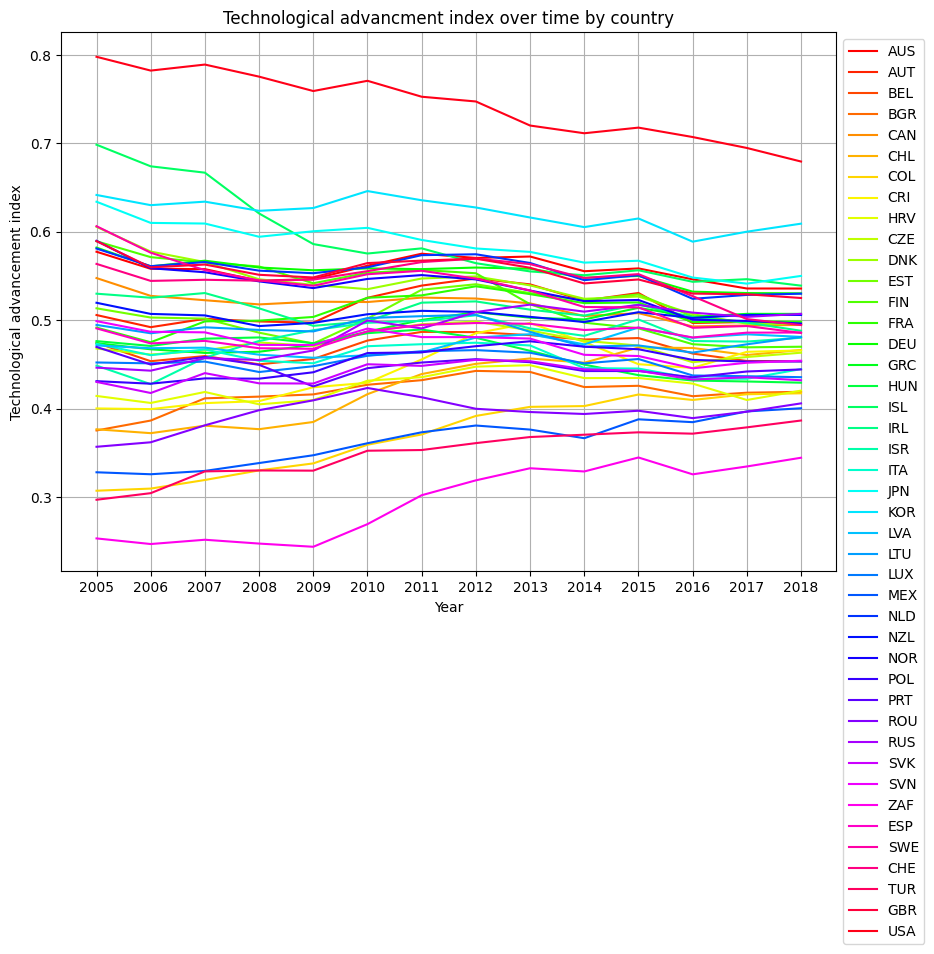

In [13]:
numberOfRows = cleaned_tech.shape[0]
numberOfColumns = cleaned_tech.shape[1]
plt.figure(figsize=(10, 7))

colors = plt.cm.hsv(np.linspace(0, 1, numberOfRows))

for row in range(numberOfRows):
    countryCode = cleaned_tech.iloc[row].name
    plt.plot(np.array(cleaned_tech.columns[0:]), cleaned_tech.iloc[row][0:], color=colors[row], label=countryCode)

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('Technological advancement index')
plt.title("Technological advancment index over time by country")

Text(0.5, 1.0, 'ESI over time by country')

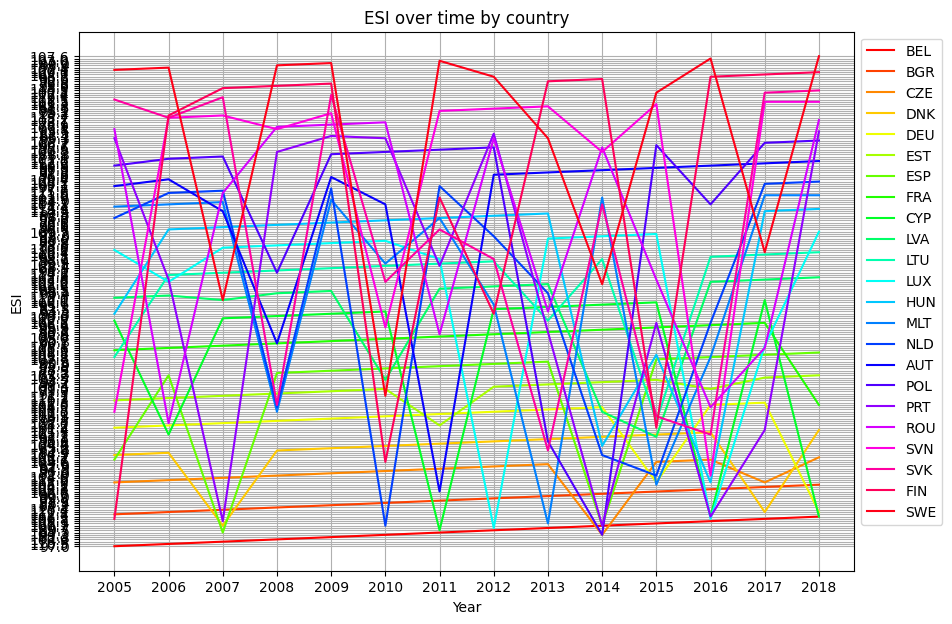

In [14]:
numberOfRows = cleaned_esi.shape[0]
numberOfColumns = cleaned_esi.shape[1]
plt.figure(figsize=(10, 7))

colors = plt.cm.hsv(np.linspace(0, 1, numberOfRows))

for row in range(numberOfRows):
    countryCode = cleaned_esi.iloc[row].name
    plt.plot(np.array(cleaned_esi.columns[0:]), cleaned_esi.iloc[row][0:], color=colors[row], label=countryCode)

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('ESI')
plt.title("ESI over time by country")

Text(0.5, 1.0, 'Unemployment tax rate over time by country')

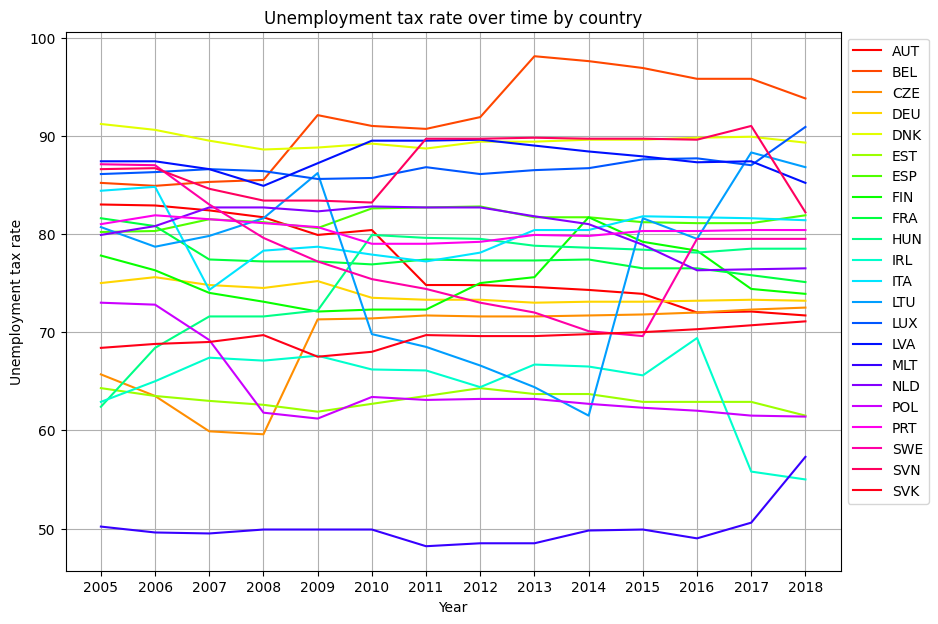

In [15]:
numberOfRows = cleaned_tr.shape[0]
numberOfColumns = cleaned_tr.shape[1]
plt.figure(figsize=(10, 7))

colors = plt.cm.hsv(np.linspace(0, 1, numberOfRows))

for row in range(numberOfRows):
    countryCode = cleaned_tr.iloc[row].name
    plt.plot(np.array(cleaned_tr.columns[0:]), cleaned_tr.iloc[row][0:], color=colors[row], label=countryCode)

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('Unemployment tax rate')
plt.title("Unemployment tax rate over time by country")

Text(0.5, 1.0, 'Unemployment tax rate over time by country')

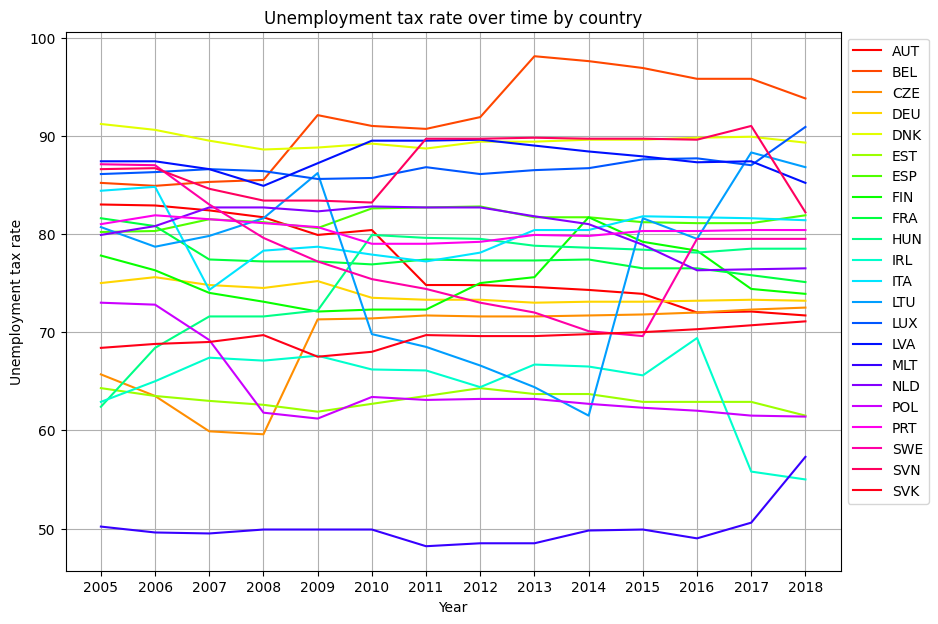

In [16]:
numberOfRows = cleaned_tr.shape[0]
numberOfColumns = cleaned_tr.shape[1]
plt.figure(figsize=(10, 7))

colors = plt.cm.hsv(np.linspace(0, 1, numberOfRows))

for row in range(numberOfRows):
    countryCode = cleaned_tr.iloc[row].name
    plt.plot(np.array(cleaned_tr.columns[0:]), cleaned_tr.iloc[row][0:], color=colors[row], label=countryCode)

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('Unemployment tax rate')
plt.title("Unemployment tax rate over time by country")

In [17]:
# concatenate the datasets together sideways
combined = pd.concat({"education":cleaned_ed, "technology":cleaned_tech, "ESI":cleaned_esi, "productivity": cleaned_prod, "tax rate":cleaned_tr}, axis=1)
combined.head()

education                                                        ...  \
         2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  ...   
AUT      80.4  80.1  79.9  80.9  81.6  82.4  82.4  82.9  83.0  83.9  ...   
BEL      66.1  66.9  68.0  69.6  70.6  70.5  71.3  71.6  72.8  73.6  ...   
BGR      72.5  75.5  77.4  77.5  77.9  79.1  80.0  81.0  81.8  81.1  ...   
CHE      83.0  85.2  86.0  86.8  86.9  85.0  84.8  85.7  86.4  87.2  ...   
CYP      66.6  69.5  72.1  73.1  72.3  74.0  75.2  77.4  78.5  77.6  ...   

    tax rate                                                        
        2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
AUT     79.9  80.4  74.8  74.8  74.6  74.3  73.9  72.0  72.1  71.7  
BEL     92.1  91.0  90.7  91.9  98.1  97.6  96.9  95.8  95.8  93.8  
BGR      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
CHE      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
CYP      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 70 columns]

In [18]:
# drop all rows with a nan in
pca_no_nan = combined.dropna(axis=0)
pca_no_nan.head()

education                                                        ...  \
         2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  ...   
AUT      80.4  80.1  79.9  80.9  81.6  82.4  82.4  82.9  83.0  83.9  ...   
BEL      66.1  66.9  68.0  69.6  70.6  70.5  71.3  71.6  72.8  73.6  ...   
CZE      89.9  90.3  90.5  90.9  91.4  91.9  92.3  92.5  92.8  93.2  ...   
DEU      83.1  83.2  84.4  85.3  85.5  86.1  86.6  86.6  86.7  86.9  ...   
DNK      81.0  81.6  74.3  73.5  74.5  75.3  76.7  77.6  77.9  78.9  ...   

    tax rate                                                        
        2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
AUT     79.9  80.4  74.8  74.8  74.6  74.3  73.9  72.0  72.1  71.7  
BEL     92.1  91.0  90.7  91.9  98.1  97.6  96.9  95.8  95.8  93.8  
CZE     71.3  71.4  71.7  71.6  71.6  71.7  71.8  72.0  72.3  72.5  
DEU     75.2  73.5  73.3  73.3  73.0  73.1  73.1  73.2  73.3  73.2  
DNK     88.8  89.2  88.7  89.4  89.4  89.6  89.6  89.8  89.9  89.3  

[5 rows x 70 columns]

In [19]:
# unstack the dataframe to swap the double index to a row
unstacked = pd.DataFrame(pca_no_nan.unstack())
unstacked.reset_index(inplace=True)
# check that no value combinations have been missed
unstacked.isnull().values.any() # returns false
unstacked


,level_0,level_1,level_2,0
0,education,2005,AUT,80.4
1,education,2005,BEL,66.1
2,education,2005,CZE,89.9
3,education,2005,DEU,83.1
4,education,2005,DNK,81.0
...,...,...,...,...
1325,tax rate,2018,POL,61.4
1326,tax rate,2018,PRT,80.4
1327,tax rate,2018,SVK,71.1
1328,tax rate,2018,SVN,82.2


In [20]:
# index by country first, then within the country by the year, with the columns as the different attributes
pca_df = unstacked.pivot(values = 0, index=["level_2","level_1"], columns="level_0")

# check again that no values have been missed
print(unstacked.isnull().values.any()) # returns false
pca_df.index.names = ["country", "year"]
pca_df.columns.names = ["feature"]
pca_df



False


feature         ESI education productivity tax rate technology
country year                                                  
AUT     2005   97.1      80.4     60.63234     83.0   0.506048
        2006  109.4      80.1    62.218785     82.9   0.492319
        2007  114.2      79.9    63.814049     82.4   0.501761
        2008   96.1      80.9    63.814456     81.7   0.498783
        2009   76.0      81.6    63.363388     79.9   0.497396
...             ...       ...          ...      ...        ...
SWE     2014  102.2      83.7    67.152902     70.1   0.515106
        2015  102.4      84.3    69.074511     69.6    0.51466
        2016  103.0      85.0    68.649665     79.5   0.491663
        2017  110.4      85.3    69.261329     79.5   0.493618
        2018  107.6      85.6    69.514519     79.5   0.485805

[266 rows x 5 columns]

In [21]:
# export this dataframe to a numpy array of floats to do PCA on
temp = np.array(pca_df)
pca_arr = temp.astype(float)
print(pca_arr)
print(np.shape(pca_arr))

[[ 97.1         80.4         60.63234     83.           0.50604847]
 [109.4         80.1         62.218785    82.9          0.49231947]
 [114.2         79.9         63.814049    82.4          0.50176077]
 ...
 [103.          85.          68.649665    79.5          0.49166302]
 [110.4         85.3         69.261329    79.5          0.49361831]
 [107.6         85.6         69.514519    79.5          0.48580522]]
(266, 5)


In [22]:
features = ["ESI", "education","productivity","tax rate","technology"]
pca = PCA()
my_pca = pca.fit(pca_df[features])
my_pca.components_



array([[-2.06317001e-02, -2.71939378e-01,  9.28560737e-01,
         2.51789508e-01,  5.55477151e-04],
       [-1.37681304e-01, -9.27021771e-01, -3.15111749e-01,
         1.49594952e-01, -6.55541474e-04],
       [-9.90143915e-01,  1.37936838e-01,  2.14612307e-02,
        -1.13035933e-02,  3.15976153e-04],
       [ 1.52695522e-02,  2.18295440e-01, -1.94982690e-01,
         9.56083343e-01, -5.78115703e-04],
       [ 2.42894209e-04, -3.74030057e-04, -8.41867379e-04,
         5.14501138e-04,  9.99999414e-01]])

In [23]:
pca_2 = PCA(n_components=2)
my_pca_2 = pca_2.fit_transform(pca_df[features])

In [24]:
my_pca.explained_variance_ratio_
# the first principal component accounts for 53% of total variance

array([5.29137617e-01, 2.62940479e-01, 1.33634238e-01, 7.42855807e-02,
       2.08487859e-06])

Plot the PCA


In [25]:
fig = px.scatter(
        x = my_pca_2[:,0],
        y = my_pca_2[:,1],
        color=pca_df.index.get_level_values(0),
        labels = {"x": "PC1","y": "PC2"},
        height = 550,
        width=700
)
fig.show()


It seems there might be separations based on region of Europe - let's explore this



In [26]:

# get a list of respective subregion for each datapoint

subregions_dict = countries.subregions
subregions = []
for code in pca_df.index.get_level_values(0):
    for country in countries.countries:
        if countries.get_country_data(country).alpha3 == code:
            subregions.append(countries.get_country_data(country).subregion)




In [39]:
comps = my_pca.transform(pca_arr)
fig = px.scatter_matrix(
    comps,
    labels={"0":"PC1","1":"PC2","2":"PC3","3":"PC4","4":"PC5"},
    color=subregions, # colour by subregion instead
    dimensions = range(5),
    height = 550,
    width=700

)
fig.update_traces(diagonal_visible = False)

fig.show()

e:\Work\ADS\.venv\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



Indeed, it seems like the first principal component separates some regions. Lets look at its interaction with the second principal component.

In [28]:

fig = px.scatter(
        x = comps[:,0],
        y = comps[:,1],
        color=subregions,
        hover_data={"Country" : pca_df.index.get_level_values(0)},
        labels = {"x": "PC1","y": "PC2"},
        height = 550,
        width=700

)
fig.show()


The left blob consists of central and eastern europe, the top one consists of portugal and spain (iberia), and the remaining parts are western and northern europe, along with germany (counted as central). The far right blob is luxembourg, which is a very small country which might be why it is so far away.

In [29]:
fig = px.scatter(
        x = comps[:,0],
        y = comps[:,2],
        color=subregions,
        hover_data={"Country" : pca_df.index.get_level_values(0)},
        labels = {"x": "PC1","y": "PC3"},
        title= "2D PCA Projection Coloured by country using PC1 and PC3",
        height = 550,
        width=700

)
fig.show()

In [30]:
fig = px.scatter(
        x = comps[:,0],
        y = comps[:,3],
        color=subregions,
        hover_data={"Country" : pca_df.index.get_level_values(0)},
        labels = {"x": "PC1","y": "PC4"},
        title= "2D PCA Projection Coloured by country using PC1 and PC4",
        height = 550,
        width=700

)
fig.show()

I have provided the principal components coloured by country too

In [32]:
comps = my_pca.transform(pca_arr)
fig = px.scatter_matrix(
    comps,
    labels=["PC1","PC2","PC3","PC4","PC5"],
    color=pca_df.index.get_level_values(0),
    dimensions = range(5),
    height = 550,
    width=700


)
fig.update_traces(diagonal_visible = False)
fig.show()



e:\Work\ADS\.venv\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

